In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Kaggle Competition : Titanic Project Analysis

## 1.0 Introduction

This is a personal project to easen me into doing Kaggle Competition. The topic covered is TODO 

## 2.0 Objective

The objective of this analysis is to identify which passengers survives the Titanic crisis.
////what model to use dl? dt?

## 3.0 Methodology Outline
This section discuss the workflow planning and the steps to approach the problem to achieve the objective.

#### 3.1 Raw Data Discovery

The first step is to perform data discovery. Data discovery involves examining the broad structure and content of the datasets, such as the data shape, non-null values, and initial statistical summaries. This phase aims to gain a preliminary understanding of the available raw data, identify potential issues like missing values, duplicates or outliers, and make informed decisions on data preprocessing strategies. From this, plan of action can be made to address the issues.

#### 3.2 Data Cleaning
Data cleaning is the crucial process of identifying and rectifying errors, inconsistencies, and inaccuracies within a dataset to ensure its accuracy, reliability, and suitability for analysis. This phase involves handling missing values, resolving duplicate entries, addressing outliers, and applying transformations to enhance the overall quality and integrity of the data.

#### 3.3 Data Exploration
Data exploration is the preliminary phase of data analysis, encompassing techniques and methodologies to systematically investigate, visualize, and understand the underlying patterns, relationships.

#### 3.4 Feature Engineering
Feature engineering is the process of transforming raw data into a format that is more suitable for analysis or modeling, with the goal of improving the performance of machine learning algorithms. This is done to provide the model with more relevant and discriminative information, ultimately improving the model's ability to make accurate predictions or uncover meaningful patterns in the data. 

#### 3.5 Data Preprocessing for Model
Data preprocessing (for model) at this stage is the preparation and transformation of raw data to make it suitable for analysis by machine learning algorithms. 

####  3.6 Model Building
This phase involves selecting an appropriate algorithm, defining the model architecture, and optimizing its parameters to make accurate predictions or uncover patterns within the data. The model selcted is tbd



# 3.1 Raw Data Discovery
We will begin by analyzing the data given. We are given 3 data, train, test, and another gender data file. The test and train are typical practice in doing ML study where train data either consist of (70% or 80%) of the raw data being used to train ML models. The remaining 20%/30% is used as "unseen data" by the model to validate the model.

Suffice to say, the presentatition of the given data suggest that the data cleaning etc has been done and ready to be used for ML training.

However, it is best practice to do our due diligence and dive into the data itself.

In [10]:
import pandas as pd
import numpy as np

# Use double backslashes or a raw string
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Or use raw string
# train = pd.read_csv(r"titanic\train.csv")
# test = pd.read_csv(r"titanic\test.csv")

# combine both train and test data to simplify our analysis
# train and test data are labeled in a new column
train['train_test'] = 1  # train_test value set to 1 for train data
test['train_test'] = 0  # train_test value set to 0 for test data

# set survived column to NaN
test['Survived'] = np.NaN

# combine
all_data = pd.concat([train, test])

%matplotlib inline


In [ ]:
## see columns of the new data
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

# Project Planning

There are two types of cases for typical data analysis project, classification and regression. Since we  are looking to predict wether a passenger survived or not, this means it is a Classification case. ie you either survived or didnt, no in between.

In [ ]:
#quick loook at the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [ ]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [ ]:
#look at numeric and categorical paramters separately
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]


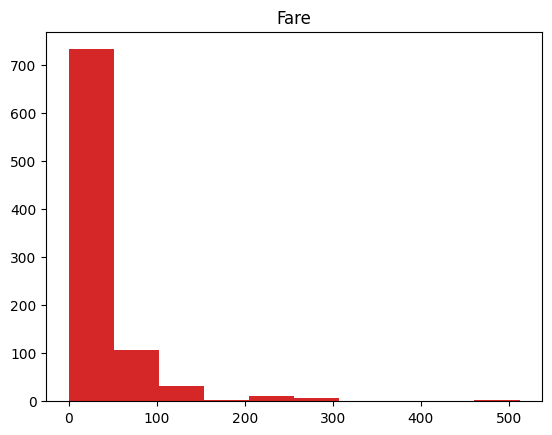

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

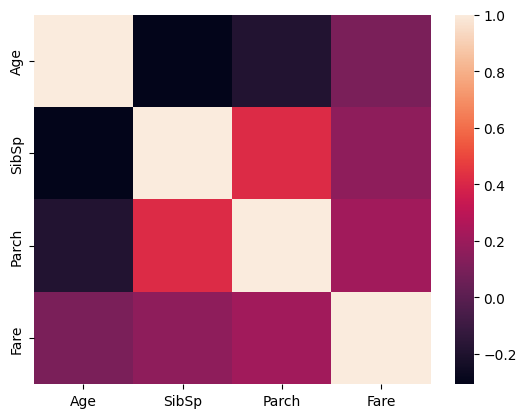

In [ ]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [ ]:
# comparing survival rate across Age, Sibsp, Parch and fare
ptable = pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])
ptable

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


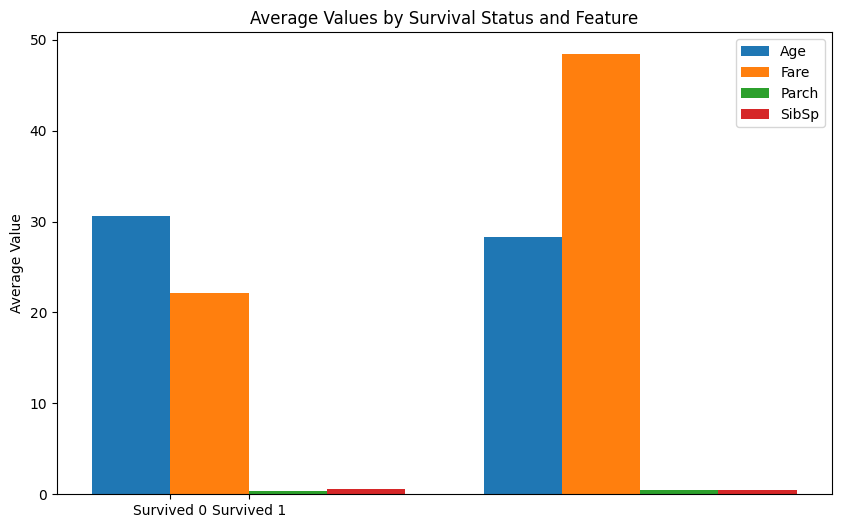

In [ ]:
# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2

for i, (feature, values) in enumerate(ptable.items()):
    x = [bar_width * i + j for j in range(len(ptable.index))]
    ax.bar(x, values, width=bar_width, label=feature)
ax.set_xticks([bar_width / 2 + bar_width * i for i in range(len(ptable.index))])
ax.set_xticklabels(['Survived 0', 'Survived 1'])
ax.legend()


ax.set_ylabel('Average Value')
ax.set_title('Average Values by Survival Status and Feature')

# Show the plot
plt.show()

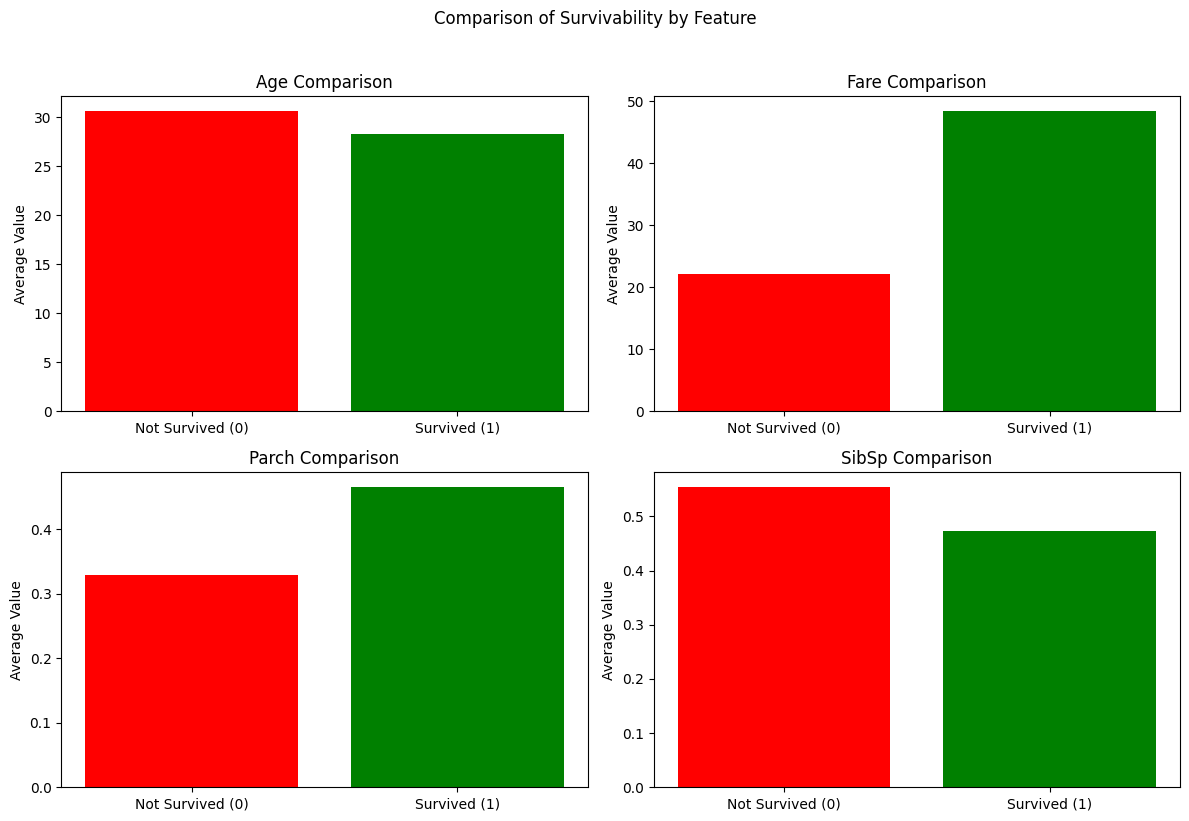

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



# Plotting individual bar charts for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Comparison of Survivability by Feature', y=1.02)

for ax, (feature, values) in zip(axes.flatten(), ptable.items()):
    ax.bar(ptable.index, values, color=['red', 'green'])
    ax.set_title(f'{feature} Comparison')
    ax.set_xticks(ptable.index)
    ax.set_xticklabels(['Not Survived (0)', 'Survived (1)'])
    ax.set_ylabel('Average Value')

plt.tight_layout()
plt.show()


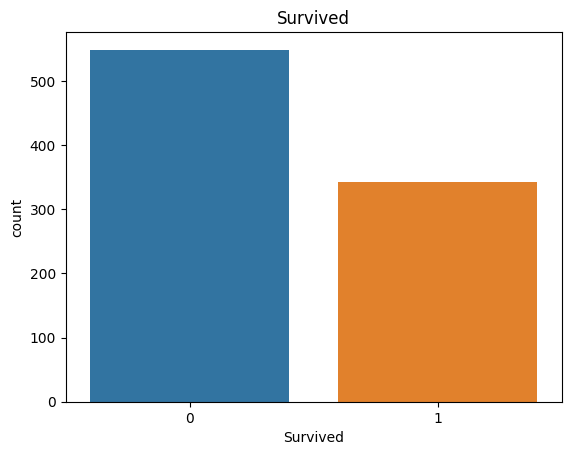

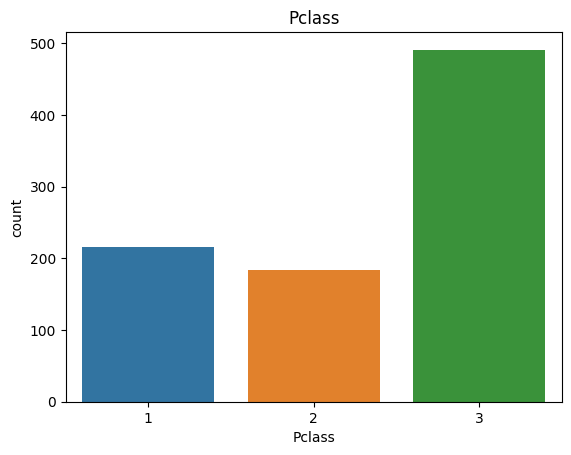

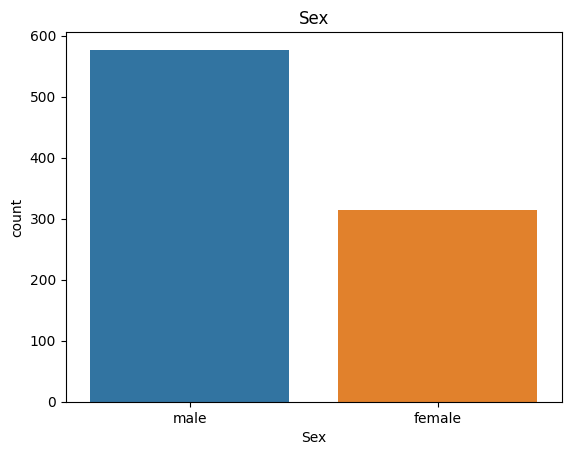

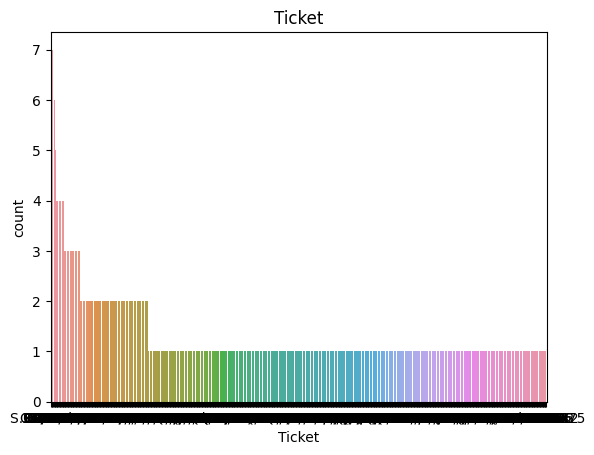

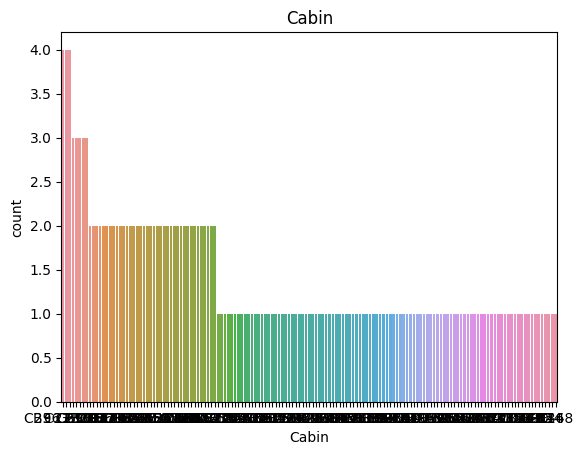

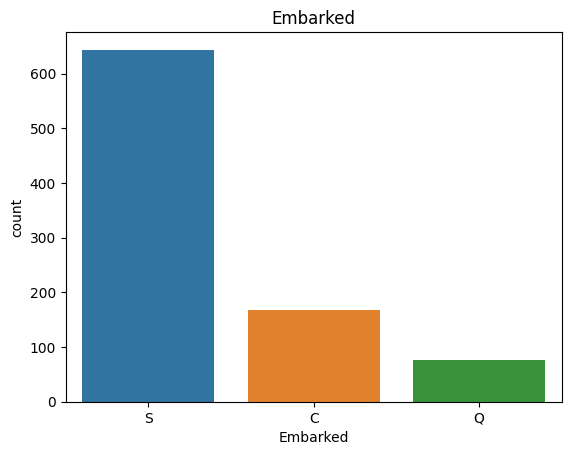

In [ ]:
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.title(i)
    plt.show()